# Librerias y datasets

Para usar los datasets de TensorFlow se necesita instalar [TensorFlow Datasets](https://www.tensorflow.org/datasets/)

In [1]:
!pip install -U tensorflow_datasets

  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21499 sha256=033edfcb6cd3ff2deaada5cd22b053e32708c30e1d04c2f266d62ef17cb401bb
  Stored in directory: c:\users\paul\appdata\local\pip\cache\wheels\29\93\c6\762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491062 sha256=9d1ee8e611123d1bb531205ad569f89517531a8ab0cb4cd21c768ca61dafadd5
  Stored in directory: c:\users\paul\appdata\local\pip\cache\wheels\56\b0\fe\4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
  Created wheel for dill: filename=dill-0.3.2-py3-none-any.whl size=78977 sha256=87c34c6e1abd2a9a9c716b86434b754408d5e22fe31b1bc8dc72b4d9c3cee9e8
  Stored in directory: c:\users\paul\appdata\local\pip\cache\wheels\72\6b\d5\5548aa1b73b8c3d176ea13f9f92066b02e82141549d90e2100
Successfully built promise future dill


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np
import math
import matplotlib.pyplot as plt

# Fashion MNIST dataset

El [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contiene 70,000 imágenes en blanco y negro en 10 categorias. Estas categorias son: camiseta / top, pantalón, Jersey, vestido, abrigo, sandalia, camisa, zapatillas de deporte, bolsas, botines. Cada imagen esta en una resoluciónn de 28x28. 

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

El Fashion MNIST es un intento de reemplazar al clasico MINST [MNIST](http://yann.lecun.com/exdb/mnist/), que es usado en el clasico "Hello Word" de visión computacional. Para el presente ejemplo usaremos 60,000 imágenes para train, y 10,000 imágenes para test.


## Load dataset

Cada imagen esta en escala de grises [0-255], con una resolución de 28x28, y su label en el rango de [0-9]. Esta es la representación de cada clase:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camiseta/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Pantalón</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Jersey</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestido</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Abrigo</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandalia</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisa</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Zapatillas de deporte</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolso</td>
  </tr>
    <tr>
    <td>9</td>
    <td>botines</td>
  </tr>
</table>




In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
labels_names = ['camiseta / top', 'pantalón', 'Jersey', 'vestido', 'abrigo', 
                'sandalia', 'camisa', 'zapatillas de deporte', 'bolsas', 'botines']

## Analisis

In [6]:
def plot_25_image(dataset_dr):
  plt.figure(figsize=(10,10))
  i = 0
  for (image, label) in dataset_dr.take(25):
      image = image.numpy().reshape((28,28))
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(image, cmap=plt.cm.binary)
      plt.xlabel(labels_names[label])
      i += 1
  plt.show()

def plot_it_image(dataset_dr, it):
  iter = 0
  for image, label in dataset_dr.take(-1):
      if iter == it:
          break
      else:
        iter += 1
  image = image.numpy().reshape((28,28))

  plt.figure()
  plt.imshow(image, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()

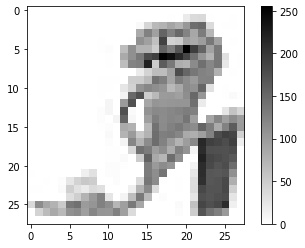

In [7]:
plot_it_image(train_dataset, 300)

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Número de ejemplos de entrenamiento: %d"%(num_train_examples))
print("Número de ejemplos de prueba: %d"%(num_test_examples))

Número de ejemplos de entrenamiento: 60000
Número de ejemplos de prueba: 10000


### Normalización

In [9]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255

  return images, labels

In [10]:
# se aplica la función de normalización para cada dataset
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [11]:
# Con la función de cache. Las imagenes serán cargadas en memoria
# logrando una rapidez en el entranamiento
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

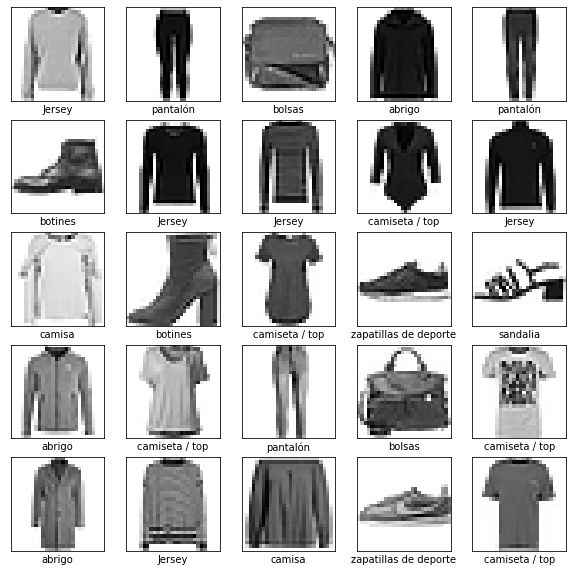

In [12]:
# plot 25 imágenes del trainset
plot_25_image(train_dataset)

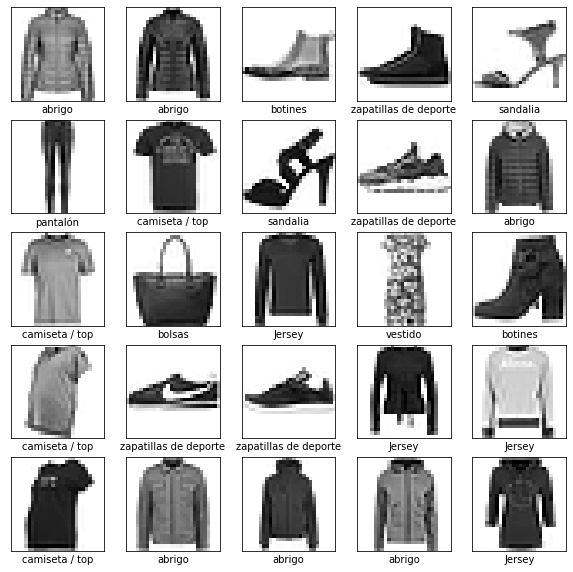

In [13]:
# plot 25 imagenes del testset
plot_25_image(test_dataset)

In [14]:
def convert_datasettf_to_numpy(dataset_tf):
  dataset_numpy = tfds.as_numpy(dataset_tf)
  X, Y = [], []
  for iter in dataset_numpy:
    iter_train, iter_test = iter
    # iter_train = np.squeeze(iter_train)
    X.append(iter_train)
    Y.append(iter_test)

  Y = np.c_[Y]
  X, Y = np.stack(X), np.stack(Y) 
  return X, Y

In [15]:
X_train, Y_train = convert_datasettf_to_numpy(train_dataset)
print("X_train.shape: %s"%(str(X_train.shape)))
print("Y_train.shape: %s"%(str(Y_train.shape)))

X_train.shape: (60000, 28, 28, 1)
Y_train.shape: (60000, 1)


In [16]:
X_test, Y_test = convert_datasettf_to_numpy(test_dataset)
print("X_test.shape: %s"%(str(X_test.shape)))
print("Y_test.shape: %s"%(str(Y_test.shape)))

X_test.shape: (10000, 28, 28, 1)
Y_test.shape: (10000, 1)


# My First Convolutional Network

## Inicialización del Modelo
Para construir un modelo de clasificación o regresión que no use redes recurrentes se usa [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential://)

### Codigo (01 punto)

In [17]:
# codea aqui
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()

## Definición de la Arquitectura del Modelo

Considera revisar [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) las diferentes capas que usa TensorFlow. Se recomienda revisar la capa [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), que recibe como parametros.


* **units**: (integer), número de neuronas de salida.
* **data_format**: (string), formato de los datos de entrada. 
* **input_shape**: (tuple), es la dimensión de los datos de entrada. Ojo si 
data_format='channels_first', los datos de entrada tienen la forma de (batch_size, previous_channels, rows, cols). Si data_format='channels_last', los datos tiene la forma de entrada (batch_size, rows, cols, previous_channel) 
* **filters** (integer), número de convoluciones (f,f,previous_channel). En la clase lo llamamos channel.
* **kernel_size** (integer, tupla/lista de 2 elementos), determinar el tamaño de la convolución o kernel. Ejemplo si kernel_size=2 el kernel es (2,2), si se usa kernel_size=(2,3), el kernel es (2,3). Por defecto es (1,1)
* **stride** (integer, tupla/list de 2 elementos), determina el valor del stride. En caso de ser stride=3, la convolución se mueve de 3 en 3 tanto en la altura, como en el ancho. 
* **padding** (string), determinar si se usa "same" o "valid" convolutional. Por defecto es "valid"
* **dilation_rate** (integer), valor de dilatación en caso de usar convolucionales dilatadas, por defecto el valor es 1.
* **activation**: (string o función), define función de activación, entre ellas: [elu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/elu), [linear](https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear) (es no aplicar una función activación no lineal. Z = WX+B), [relu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu), [sigmoid](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid), [softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax), [tanh](https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh). Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/activations 
* **use_bias**: (boolean), True para usar bias, False para no usar bias. En caso de False, se definiría la capa como: $funActi(w^{T}x^{(i)})$.
* **kernel_initializer** (string o función), manera de inicializar los valores de la matriz de pesos. Esta matriz presenta la dimension: (**input_dim**, **units**) Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/initializers 
* **bias_initializer** (string o función), manera de inicialiar los valores del bias. Este vector presenta la dimensión: (**units**). Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/initializers

Nota: considera que si data_format='channels_last', la dimensión de salida sera: (batch_size, new_rows, new_cols, filters). Para nosotros filters hace a refernecia a los 'channels'. Este es un ejemplo de codigo:

```
tf.keras.layers.Conv2D(
  input_shape=(4, 28, 28, 3)   # dimensión de entrada
  filters=2,                   # tamaño del filtro
  kernel_size=3,               # dimensión de la convolución
  strides=(1, 1),              # stride
  padding='valid',             # padding
  data_format='channels_last', # formato de los datos de entrada
  activation='relu',           # función de activación
  use_bias=True,
  kernel_initializer='uniform', 
  bias_initializer='zeros')

```
Para las capas feed forward ($funActi(w^{T}x^{(i)}+b)$)se usa: [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). Esta función recibe como parametros:


* **units**: (integer), número de neuronas de salida.
* **input_dim**: (integer), número de neuronas de entrada. Solo se define en la primera capa, en la siguientes TensorFlow define este valor, usando las **units** de la capa anterior.
* **activation**: (string o función), define función de activación, entre ellas: [elu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/elu), [linear](https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear) (es no aplicar una función activación no lineal. Z = WX+B), [relu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu), [sigmoid](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid), [softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax), [tanh](https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh). Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/activations 
* **use_bias**: (boolean), True para usar bias, False para no usar bias. En caso de False, se definiría la capa como: $funActi(w^{T}x^{(i)})$.
* **kernel_initializer** (string o función), manera de inicializar los valores de la matriz de pesos. Esta matriz presenta la dimension: (**input_dim**, **units**) Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/initializers 
* **bias_initializer** (string o función), manera de inicialiar los valores del bias. Este vector presenta la dimensión: (**units**). Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/initializers

En general los parametros son los más usados. Pero también presenta otros como: **bias_regularizer**, **activity_regularizer**, **kernel_constraint**, **bias_constraint**. Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense Este es un ejemplo de codigo


```
tf.keras.layers.Dense(units=1,                      # numero de neuronas de salida
                      activation='sigmoid',         # función de activación
                      use_bias=True,                # True: se usa bias, false: no se usa bias
                      kernel_initializer='uniform', # como se inicializa la matriz de pesos
                      bias_initializer='zeros',     # como se inicializa el bias
                      input_dim=2)                  # input_dim: número de neuronas entrada
```

Habra puntos extras si utilizas convolucionales dilatadas, pero debes de tener cuidado con las dimensiones resultantes. Ademas tu modelo debe ser lo suficientemente bueno



### Codigo (70 puntos)

In [18]:
X_train.shape

(60000, 28, 28, 1)

In [19]:
# code aqui
#model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# F ES EL TAMAÑ Y C1 ES EL FILTER
model = tf.keras.Sequential()
model.add(
tf.keras.layers.Conv2D(
  input_shape=(28, 28, 1),   # dimensión de entrada
  filters=10,                   # tamaño del filtro o TAMAÑO DE CONVOLUCIONALES
  kernel_size=3,               # dimensión de la convolución ES EL F DE NUESTRA FORMULA
  strides=(1, 1),              # stride
  padding='valid',             # padding
  data_format='channels_last', # formato de los datos de entrada
  activation='relu',           # función de activación
  use_bias=True,
  kernel_initializer='uniform', 
  bias_initializer='zeros'))

model.add(tf.keras.layers.Conv2D(
  filters=20,                   # tamaño del filtro
  kernel_size=5,               # dimensión de la convolución
  strides=(1, 1),              # stride
  padding='valid',             # padding
  data_format='channels_last', # formato de los datos de entrada
  activation='relu',           # función de activación
  use_bias=True,
  kernel_initializer='uniform', 
  bias_initializer='zeros'))


model.add(tf.keras.layers.Conv2D(
  filters=40,                   # tamaño del filtro
  kernel_size=2,               # dimensión de la convolución
  strides=(1, 1),              # stride
  padding='valid',             # padding
  data_format='channels_last', # formato de los datos de entrada
  activation='relu',           # función de activación
  use_bias=True,
  kernel_initializer='uniform', 
  bias_initializer='zeros'))



model.add(tf.keras.layers.MaxPooling2D((2,2))) 
model.add(tf.keras.layers.Dropout(0.1)) #normalizamos
model.add(tf.keras.layers.Flatten()) #ponemos en array

model.add(tf.keras.layers.Dense(units=40,                      # numero de neuronas de salida
                      activation='relu',         # función de activación
                      use_bias=True,                # True: se usa bias, false: no se usa bias
                      kernel_initializer='uniform', # como se inicializa la matriz de pesos
                      bias_initializer='zeros'     # como se inicializa el bias
                      #input_dim=2)                  # input_dim: número de neuronas entrada
                               ))
model.add(tf.keras.layers.Dense(units=20,                      # numero de neuronas de salida
                      activation='relu',         # función de activación
                      use_bias=True,                # True: se usa bias, false: no se usa bias
                      kernel_initializer='uniform', # como se inicializa la matriz de pesos
                      bias_initializer='zeros'     # como se inicializa el bias
                      #input_dim=2)                  # input_dim: número de neuronas entrada
                               ))
model.add(tf.keras.layers.Dense(units=10,                      # numero de neuronas de salida
                      activation='softmax',         # función de activación
                      use_bias=True,                # True: se usa bias, false: no se usa bias
                      kernel_initializer='uniform', # como se inicializa la matriz de pesos
                      bias_initializer='zeros'     # como se inicializa el bias
                      #input_dim=2)                  # input_dim: número de neuronas entrada
                               ))

## Función de Perdida & Optimizador



Para definir la función a optimizar (función de perdida), y el optimizador se usa: [model.compile](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile). Esta función presenta como parametros:
* **loss** (string o función), define la función de perdida entre ellas: [binary cross entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy), [multi class classification](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy), [Mean Absolute Error](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanAbsoluteError) usada para regresión. Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/losses
* **optimizer** (string o función), define el optimizar, entre ellos: 
* **metrics** (array de string o función), se define las metricas de evaluacióna, entre ellas [accuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy), [area under curve](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC), [mean absolute error](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError), etc. Para mayor detalle revisar: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy

### Codigo (05 puntos)

In [20]:
 # codea aqui
    
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

## Entrenamiento


Al igual que se hace en [scikit-learn](https://scikit-learn.org/stable/) se usa la función [model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit), donde model es el modelo previamente definido. Entre sus parametros se tiene: 
* **x** (array, list, tensor) que representa los datos entrada. Para el ejemplo en este iPython, se tiene la dimensión de (**m**, **n**). Donde **m** es la cantidad de datos entrenamiento, y **n** es el número de features de cada dato entrenamiento.
* **y** (array, list, tensor) representa el target. En caso de clasificación binaria se tiene la dimensión de (**m**, **1**). Donde **m** es la cantidad de datos de entrenamiento.
* **batch_size** (integer), tamaño del batch, por default es 32.
* **epochs** (integer), número de épocas de entrenamiento.
* **verbose** (boolean), en caso de **True** se imprime por cada época finalizada el valor de perdida y las métricas escogidas. Si es **False** no se imprime nada.

La función **model.fit** retorna un objeto **History**. Donde **History.history** es el registro de los valor de la función perdidas, y las distintas metricas elegidas en **model.compile(..., metrics=\[...\])**. 

Nota: Considera si debes usa one_hot_encoding en de caso de usar codea tu función(**Puntos extras si codificas esta función**). También debes de pensar que son 60,000 datos de entrenamiento, considera como debes partir el data set para realizar tus pruebas.

### Codigo- One hot encoding (puntos extras)


In [21]:
def one_hot_encoding_function(Y, num_class):
    y_onehot_encoding_temp = tf.keras.backend.one_hot(np.ravel(Y), num_class).numpy() # conversión one hot encoding
    return y_onehot_encoding_temp

In [22]:
#X_train[0]
#Y_train 

y_onehot_encoding= one_hot_encoding_function(Y_train,10)

In [44]:
#y_onehot_encoding

In [50]:
#y_onehot_encoding
history = model.fit(x=X_train,
                     y=y_onehot_encoding,
                     batch_size=32,
                     epochs=30,
                     verbose=True)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(30,
                                                                      history.history['loss'][-1],
                                                                      history.history['accuracy'][-1]))     


Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6652 - accuracy: 0.7493
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4618 - accuracy: 0.8296
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3951 - accuracy: 0.8542
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3553 - accuracy: 0.8703
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3169 - accuracy: 0.8839
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2903 - accuracy: 0.8934
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2650 - accuracy: 0.9030
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2469 - accuracy: 0.9092
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2337 - accuracy: 0.9143
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.21

### Codigo (01 puntos) 

In [51]:
# codea aqui
history.history.keys()

dict_keys(['loss', 'accuracy'])

## Predicción y plotea

Usa el modelo entrenado y codea gráficas de "**num_epochs vs loss**", y "**num_epochs vs accuracy**"

### Codigo (03 puntos)

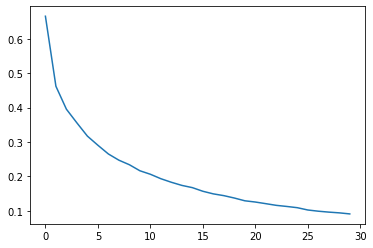

In [52]:
plt.plot(history.history['loss'])

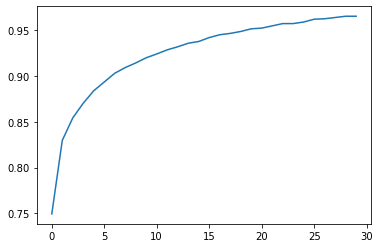

In [53]:
# codea aquiimport keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
#plt.plot(history.history['loss'])

In [24]:
#CÓDIGO RECOMENDADO para ver como va avanzando el modelo sobre el test set
num_epochs=30
y_onehot_encoding_test= one_hot_encoding_function(Y_test,10)
history = model.fit(x=X_train,
                    y=y_onehot_encoding,
                    validation_data=(X_test, y_onehot_encoding_test),
                    batch_size=32,
                    epochs=num_epochs,
                    verbose=True)
print("Finished training the model, epoch:%d, loss:%f , accuracy:%f"%(30,
                                                                      history.history['loss'][-1],
                                                                      history.history['accuracy'][-1]))   

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4514 - accuracy: 0.8302 - val_loss: 0.4129 - val_accuracy: 0.8482
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3819 - accuracy: 0.8591 - val_loss: 0.3778 - val_accuracy: 0.8600
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3340 - accuracy: 0.8777 - val_loss: 0.3281 - val_accuracy: 0.8786
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2991 - accuracy: 0.8898 - val_loss: 0.3216 - val_accuracy: 0.8834
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2734 - accuracy: 0.8995 - val_loss: 0.2996 - val_accuracy: 0.8926
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2532 - accuracy: 0.9071 - val_loss: 0.2792 - val_accuracy: 0.8998
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2336 - accuracy: 0.9142 - val_loss: 0.2723 - val_accuracy:

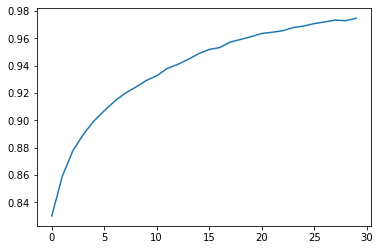

In [25]:
# codea aquiimport keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
#plt.plot(history.history['loss'])

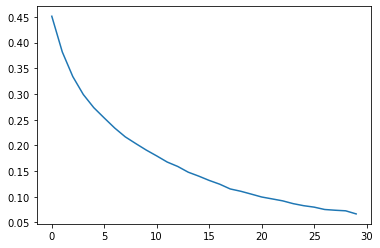

In [26]:
plt.plot(history.history['loss'])

### Analisis y discusión (20 puntos)
Realiza un analisis y explicación del ¿porque de tu modelo escogido?, ¿porque consideras que es bueno?, ¿en que piensas que falla?, ¿por que elgistes tal arquitectura?, ¿que recomendarías usar?

***--- De todos me pareció el más práctico y que tiene un buen accuracy, si bien es cierto la arquitectura no se ve tan compleja pero no siempre los mejores resultados serán por la mayor cantidad de lineas de código, porque se carga el modelo y se pierde datos esenciales.***


# Arquitectura y Número de Parametros.
Sube una foto o escribe tu arquitectura. Además, por cada capa describe las dimensiones de entrada y de salida, las dimensiones de los parámetros, e hiperparametros. Guiate de la clase del sábado. Después, calcula el número de parametros (no uses la misma libreria tensorflow, usa tu propio puño y letra) La imagen siguiente muestra un ejemplo: 

![picture](https://drive.google.com/uc?id=1UdcKArDgUYgJPVMlF9Cmpc-0rjGIrH5y)
![picture](https://drive.google.com/uc?id=1efOX8MzRmdOQyd0SMLSyr5GT7UF1LYR3)



***-- BORRA y comenta aca***




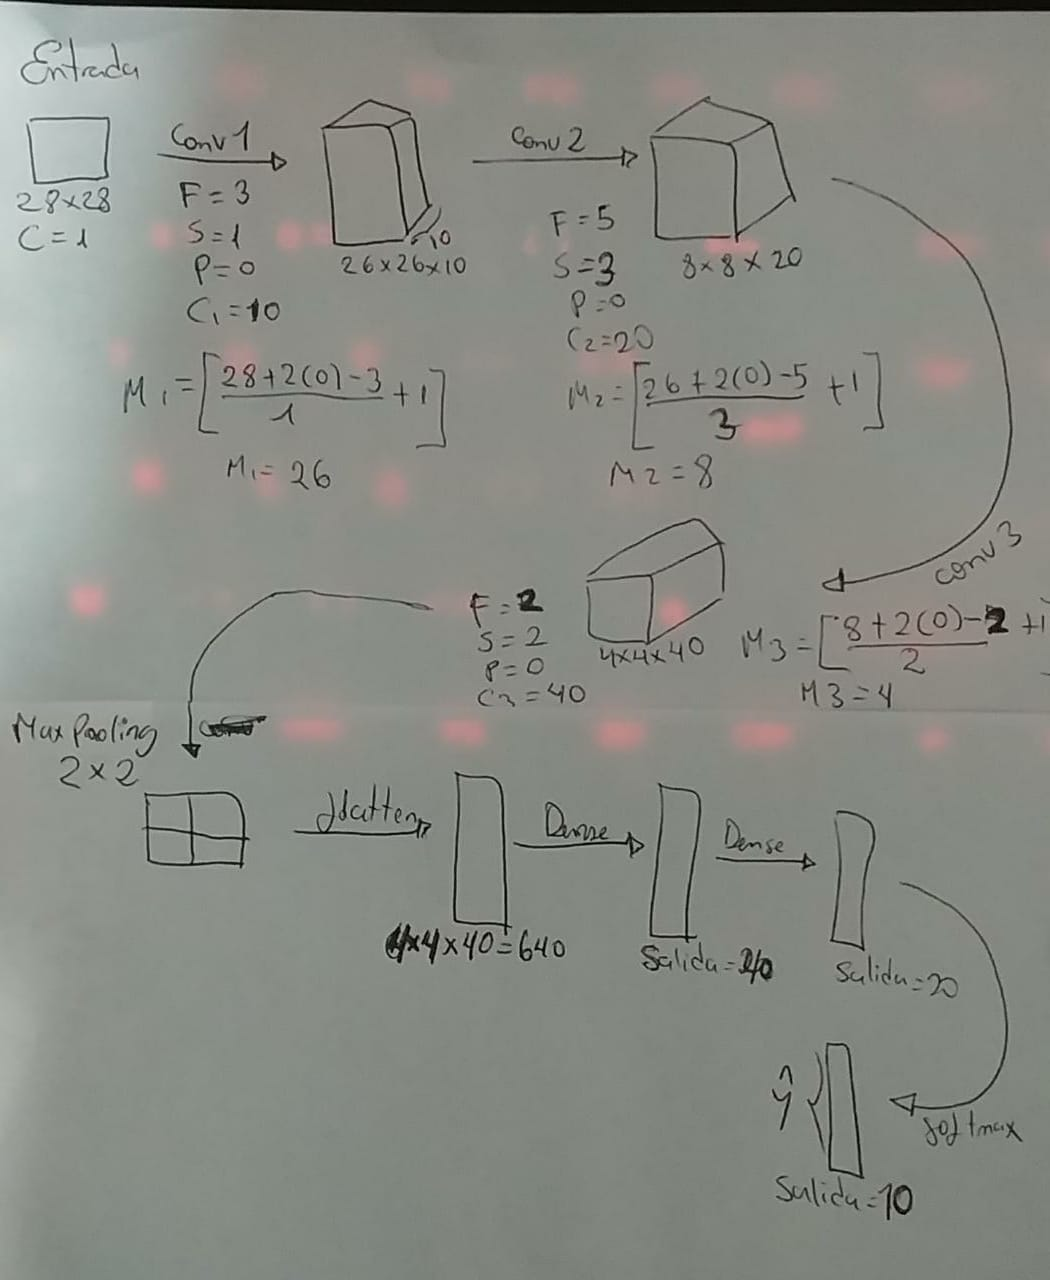